In [40]:
import pandas as pd 

import os
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [41]:
data_2022 = pd.read_csv("Game_data/2022_LoL_esports_match_data_from_OraclesElixir_20221016.csv")
data_2021 = pd.read_csv("Game_data/2021_LoL_esports_match_data_from_OraclesElixir_20221016.csv")
data_2020 = pd.read_csv("Game_data/2020_LoL_esports_match_data_from_OraclesElixir_20221016.csv")
data_2019 = pd.read_csv("Game_data/2019_LoL_esports_match_data_from_OraclesElixir_20221016.csv")

/Users/alexandreberkovic/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## ETL

In [42]:
together = pd.concat([data_2019, data_2020, data_2021, data_2022], axis = 0)

In [43]:
together.reset_index(inplace = True)

In [44]:
together.head()

,index,gameid,datacompleteness,url,league,year,split,playoffs,date,game,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,0,ESPORTSTMNT01/1030526,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 14:56:22,1.0,...,133.0,-549.0,-276.0,-3.0,1.0,0.0,1.0,3.0,0.0,1.0
1,1,ESPORTSTMNT01/1030526,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 14:56:22,1.0,...,84.0,439.0,-21.0,-14.0,2.0,4.0,2.0,0.0,0.0,1.0
2,2,ESPORTSTMNT01/1030526,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 14:56:22,1.0,...,125.0,-170.0,-675.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3,ESPORTSTMNT01/1030526,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 14:56:22,1.0,...,120.0,1691.0,1692.0,20.0,3.0,4.0,0.0,0.0,1.0,3.0
4,4,ESPORTSTMNT01/1030526,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 14:56:22,1.0,...,6.0,1168.0,671.0,20.0,1.0,6.0,1.0,1.0,0.0,2.0


In [50]:
# filter data to be in leagues: LCS,LCK,LPL,LEC 
 
# together = together[together['league'].isin(['LCS','LCK','LPL','LEC'])]

league_filtered = together[together['league'].isin(["LCS", "LCK", "LPL", "LEC"])]

In [46]:
team_filtered = league_filtered[league_filtered['playerid'].isna()]

In [20]:
relevant_columns = ['gameid', 'position', 'playerid', 'teamid', 
                    'champion', 'ban1', 'ban2', 'ban3', 'ban4', 
                    'ban5', 'kills', 'deaths', 'assists', 'teamkills', 
                    'teamdeaths',  'doublekills', 
                    'triplekills', 'quadrakills', 'pentakills', 'firstblood',
                    'firstbloodkill', 'firstbloodassist', 'team kpm', 'ckpm',
                    'firstdragon', 'dragons', 'opp_dragons', 'elementaldrakes',
                    'opp_elementaldrakes', 'elders', 'opp_elders', 'firstherald', 'heralds',
                    'opp_heralds', 'firstbaron', 'barons', 'opp_barons', 'firsttower',
                    'towers', 'opp_towers', 'firstmidtower', 'firsttothreetowers',
                    'turretplates', 'opp_turretplates', 'inhibitors', 'opp_inhibitors',
                    'damagetochampions', 'dpm', 'damageshare', 'damagetakenperminute',
                    'damagemitigatedperminute', 'wardsplaced', 'wpm', 'wardskilled',
                    'wcpm', 'controlwardsbought','vspm', 'totalgold',
                    'earnedgold', 'earned gpm', 'earnedgoldshare', 'goldspent', 'gspd',
                     'minionkills', 'monsterkills', 'cspm', 'goldat10', 'xpat10',
                    'csat10', 'opp_goldat10', 'opp_xpat10', 'opp_csat10', 'golddiffat10', 'xpdiffat10',
                    'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'opp_killsat10', 'opp_assistsat10',
                    'opp_deathsat10', 'goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15',
                    'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'opp_killsat15'
                    ]


relevant_columns = sorted(relevant_columns)
print(sorted(relevant_columns))

filtered_y = team_filtered.loc[:, 'result']
filtered = team_filtered.loc[:, relevant_columns]

['assists', 'assistsat10', 'assistsat15', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'barons', 'champion', 'ckpm', 'controlwardsbought', 'csat10', 'csat15', 'csdiffat10', 'csdiffat15', 'cspm', 'damagemitigatedperminute', 'damageshare', 'damagetakenperminute', 'damagetochampions', 'deaths', 'deathsat10', 'doublekills', 'dpm', 'dragons', 'earned gpm', 'earnedgold', 'earnedgoldshare', 'elders', 'elementaldrakes', 'firstbaron', 'firstblood', 'firstbloodassist', 'firstbloodkill', 'firstdragon', 'firstherald', 'firstmidtower', 'firsttothreetowers', 'firsttower', 'gameid', 'goldat10', 'goldat15', 'golddiffat10', 'golddiffat15', 'goldspent', 'gspd', 'heralds', 'inhibitors', 'kills', 'killsat10', 'killsat15', 'minionkills', 'monsterkills', 'opp_assistsat10', 'opp_barons', 'opp_csat10', 'opp_csat15', 'opp_deathsat10', 'opp_dragons', 'opp_elders', 'opp_elementaldrakes', 'opp_goldat10', 'opp_goldat15', 'opp_heralds', 'opp_inhibitors', 'opp_killsat10', 'opp_killsat15', 'opp_towers', 'opp_turretplates'

In [21]:
categorical_features = ['ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'champion', 'teamid', 'playerid', 'position', 'gameid']

In [22]:
filtered_cat = filtered.loc[:, ~filtered.columns.isin(categorical_features)]

In [23]:
filtered

,assists,assistsat10,assistsat15,ban1,ban2,ban3,ban4,ban5,barons,champion,...,turretplates,vspm,wardskilled,wardsplaced,wcpm,wpm,xpat10,xpat15,xpdiffat10,xpdiffat15
106,64,3.0,3.0,Galio,Irelia,Gragas,Alistar,Fiddlesticks,1.0,NaN,...,NaN,7.0156,51.0,106.0,1.4427,2.9986,19462.0,30107.0,1286.0,45.0
107,37,4.0,10.0,Cassiopeia,Lucian,Rakan,Kalista,Caitlyn,0.0,NaN,...,NaN,6.5347,44.0,104.0,1.2447,2.9420,18176.0,30062.0,-1286.0,-45.0
118,24,1.0,2.0,Rakan,LeBlanc,Lissandra,Gragas,Urgot,0.0,NaN,...,NaN,6.5224,42.0,83.0,1.3298,2.6280,18670.0,29659.0,-477.0,-1439.0
119,54,1.0,5.0,Cassiopeia,Lucian,Aatrox,Morgana,Viktor,1.0,NaN,...,NaN,5.9525,33.0,93.0,1.0449,2.9446,19147.0,31098.0,477.0,1439.0
130,38,3.0,3.0,Caitlyn,Camille,Lucian,Alistar,Thresh,1.0,NaN,...,NaN,7.3642,48.0,95.0,1.4487,2.8672,19347.0,29576.0,1374.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499787,7,0.0,1.0,Sejuani,Kalista,Yuumi,Trundle,Wukong,0.0,NaN,...,6.0,7.5135,61.0,90.0,2.2035,3.2511,17796.0,27929.0,-1739.0,-2604.0
499822,14,7.0,11.0,Sejuani,LeBlanc,Azir,Kennen,Gangplank,0.0,NaN,...,1.0,6.7917,25.0,73.0,1.0047,2.9337,16692.0,28297.0,15.0,917.0
499823,62,2.0,2.0,Senna,Kalista,Renekton,Taliyah,Ornn,1.0,NaN,...,5.0,5.8272,24.0,70.0,0.9645,2.8131,16677.0,27380.0,-15.0,-917.0
499834,27,3.0,7.0,Sejuani,LeBlanc,Yuumi,Kennen,Gangplank,0.0,NaN,...,2.0,6.2333,32.0,107.0,1.0667,3.5667,16172.0,26600.0,-771.0,-1700.0


## Initial EDA

In [53]:
df = league_filtered

In [54]:
# remove rows with no champion
df = df[df["champion"].notna()]

In [61]:
# reset index of df
df.reset_index(inplace = True)

In [62]:
#  column names of filtered 
df["champion"].unique()

array(['Aatrox', 'Kayn', 'Lissandra', 'Sivir', 'Thresh', 'Urgot',
       'Sejuani', 'Akali', "Kai'Sa", 'Braum', 'Camille', 'Irelia',
       'Ezreal', 'Vladimir', 'Zac', 'Jayce', 'Alistar', 'Yasuo', 'Varus',
       'Tahm Kench', 'Sion', 'Gragas', 'Nautilus', 'Kled', 'Kalista',
       'Xin Zhao', 'Syndra', 'Xayah', 'Rakan', 'Lee Sin', 'Zilean',
       'Viktor', 'Nidalee', 'Aurelion Sol', 'Caitlyn', 'Morgana', 'Zoe',
       'Galio', 'Jax', "Kha'Zix", 'Poppy', 'Lucian', 'Ryze', 'Renekton',
       'Jarvan IV', 'Gangplank', 'Cassiopeia', "Vel'Koz", 'Olaf', 'Leona',
       'Taliyah', 'Rumble', 'Ashe', 'Elise', 'Darius', 'Fiora',
       'Nocturne', 'Karthus', 'Pyke', 'Kennen', 'Draven', 'Evelynn',
       'Ornn', 'Taric', 'Lulu', 'Tristana', 'Vayne', 'Jhin', 'Swain',
       "Rek'Sai", 'Fiddlesticks', 'LeBlanc', 'Neeko', 'Soraka', 'Jinx',
       'Malzahar', 'Shen', 'Annie', "Kog'Maw", 'Nunu & Willump', 'Azir',
       'Ziggs', 'Karma', 'Ivern', 'Riven', 'Xerath', 'Corki', 'Kindred',
       'Trund

/Users/alexandreberkovic/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


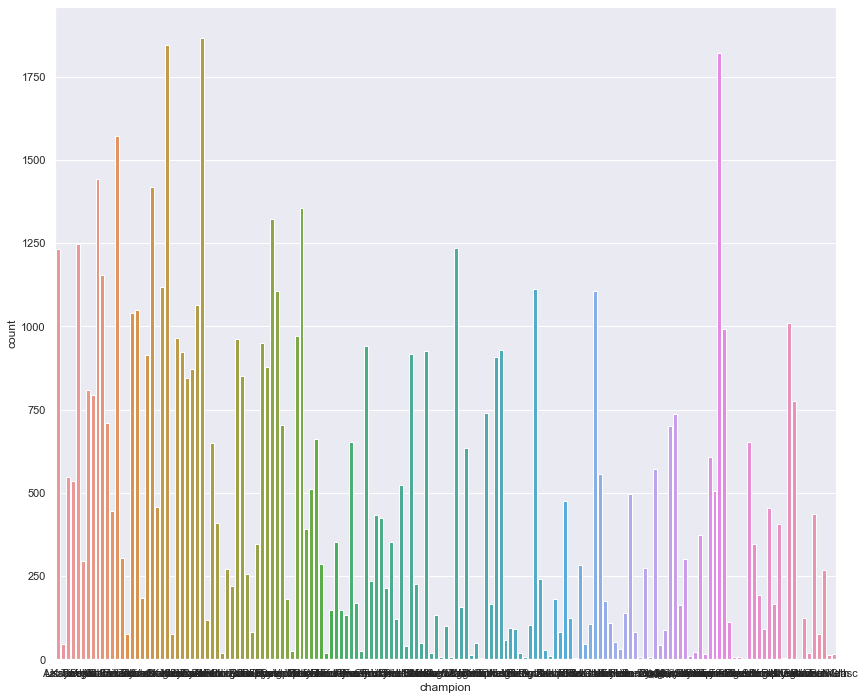

In [63]:
# increase size of sns plot
sns.set(rc={'figure.figsize':(14,12)})

sns.countplot(df['champion'], label="Count")
plt.show()

In [64]:
df.head()

,level_0,index,gameid,datacompleteness,url,league,year,split,playoffs,date,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,96,96,4268-5346,complete,https://lpl.qq.com/es/stats.shtml?bmid=4268,LPL,2019,Spring,0,2019-01-14 09:24:00,...,124.0,-19.0,-301.0,12.0,0.0,1.0,1.0,2.0,2.0,1.0
1,97,97,4268-5346,complete,https://lpl.qq.com/es/stats.shtml?bmid=4268,LPL,2019,Spring,0,2019-01-14 09:24:00,...,71.0,871.0,749.0,23.0,1.0,1.0,2.0,1.0,4.0,0.0
2,98,98,4268-5346,complete,https://lpl.qq.com/es/stats.shtml?bmid=4268,LPL,2019,Spring,0,2019-01-14 09:24:00,...,136.0,895.0,-218.0,10.0,1.0,0.0,1.0,0.0,0.0,1.0
3,99,99,4268-5346,complete,https://lpl.qq.com/es/stats.shtml?bmid=4268,LPL,2019,Spring,0,2019-01-14 09:24:00,...,128.0,209.0,236.0,12.0,0.0,1.0,1.0,1.0,3.0,1.0
4,100,100,4268-5346,complete,https://lpl.qq.com/es/stats.shtml?bmid=4268,LPL,2019,Spring,0,2019-01-14 09:24:00,...,28.0,-844.0,-421.0,-21.0,1.0,0.0,1.0,2.0,1.0,0.0
